***Preparation***

Read in libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Read in data and schema.

In [2]:
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

***Data understanding***

Get to know data and schema. Evaluate shape of data, number of NaNs and take a look at a couple of sample lines of the dataframe as well as the entire schema.

In [3]:
df.shape

(19102, 154)

In [4]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None, 'display.max_colwidth', 100) : 
    display(df)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new opportunities",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stack Overflow,9.0,Deskto

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 1000) :  
    print(schema)

                               Column  \
0                          Respondent   
1                        Professional   
2                        ProgramHobby   
3                             Country   
4                          University   
5                    EmploymentStatus   
6                     FormalEducation   
7                      MajorUndergrad   
8                          HomeRemote   
9                         CompanySize   
10                        CompanyType   
11                       YearsProgram   
12                      YearsCodedJob   
13                  YearsCodedJobPast   
14                      DeveloperType   
15                   WebDeveloperType   
16                MobileDeveloperType   
17                   NonDeveloperType   
18                 CareerSatisfaction   
19                    JobSatisfaction   
20                      ExCoderReturn   
21                    ExCoderNotForMe   
22                     ExCoderBalance   
23              

In [6]:
with pd.option_context('display.max_rows', None):
    print(df.isna().sum().sort_values(axis=0))

Respondent                              0
Professional                            0
ProgramHobby                            0
Country                                 0
University                              0
EmploymentStatus                        0
FormalEducation                         0
YearsProgram                           97
PronounceGIF                          162
HomeRemote                           2631
CareerSatisfaction                   3000
MajorUndergrad                       3203
YearsCodedJob                        3711
ClickyKeys                           3744
JobSatisfaction                      3849
CompanySize                          4449
CompanyType                          4493
TabsSpaces                           4797
DeveloperType                        5330
StackOverflowDescribes               5546
HaveWorkedLanguage                   5576
WorkStart                            5579
StackOverflowSatisfaction            5650
AuditoryEnvironment               

***Data exploration & question #1***

I am interested to know how attributes one cannot (easily) change affect someone's job satisfaction and salary. Gender is such an attribute. I previously did the same analysis for the attribute 'HighestEducationParents' with interesting results as well (not included in the notebook anymore).

Starting with the impact of gender.

Understand data: How many males / females / others answered the questionnaire?

In [7]:
df.Gender.value_counts()

Male                                                       11664
Female                                                       970
Other                                                         73
Gender non-conforming                                         54
Male; Other                                                   42
Female; Transgender                                           28
Transgender                                                   20
Male; Gender non-conforming                                   19
Female; Gender non-conforming                                 11
Transgender; Gender non-conforming                             5
Male; Female                                                   5
Male; Transgender                                              4
Male; Female; Transgender; Gender non-conforming; Other        4
Female; Transgender; Gender non-conforming                     3
Male; Female; Transgender                                      2
Male; Female; Transgender

Data preparation: I will focus on 3 subsets of the data in the following: male, female and 'others'

In [8]:
dfmale=df[df.Gender=='Male']
dffemale=df[df.Gender=='Female']
dfothers0=df[df.Gender!='Female']
dfothers=dfothers0[dfothers0.Gender!='Male']

print('Shape of the dataframe with male participants: ', dfmale.shape,
       '\nShape of the dataframe with female participants: ', dffemale.shape, 
      '\nShape of the dataframe with other participants: ', dfothers.shape)

Shape of the dataframe with male participants:  (11664, 154) 
Shape of the dataframe with female participants:  (970, 154) 
Shape of the dataframe with other participants:  (6468, 154)


Data analysis: Explore key statistics of Salary, Job satisfaction and career satisfaction per gender

In [9]:
gender_stats_dict={'Gender': ['all','male','female','others'],
             'Salary means': [df.Salary.mean(),dfmale.Salary.mean(),dffemale.Salary.mean(),dfothers.Salary.mean()],
             'Salary medians': [df.Salary.median(),dfmale.Salary.median(),dffemale.Salary.median(),dfothers.Salary.median()],
             'Job Satisfaction means': [df.JobSatisfaction.mean(),dfmale.JobSatisfaction.mean(),dffemale.JobSatisfaction.mean(),dfothers.JobSatisfaction.mean()],
             'Job Satisfaction medians': [df.JobSatisfaction.median(),dfmale.JobSatisfaction.median(),dffemale.JobSatisfaction.median(),dfothers.JobSatisfaction.median()],
             'Career Satisfaction means': [df.CareerSatisfaction.mean(),dfmale.CareerSatisfaction.mean(),dffemale.CareerSatisfaction.mean(),dfothers.CareerSatisfaction.mean()],
             'Career Satisfaction medians': [df.CareerSatisfaction.median(),dfmale.CareerSatisfaction.median(),dffemale.CareerSatisfaction.median(),dfothers.CareerSatisfaction.median()]}
gender_stats=pd.DataFrame(data=gender_stats_dict)
gender_stats.set_index('Gender', inplace=True)
gender_stats

,Salary means,Salary medians,Job Satisfaction means,Job Satisfaction medians,Career Satisfaction means,Career Satisfaction medians
Gender,,,,,,
all,58341.398571,51612.903226,7.000721,7.0,7.343932,8.0
male,59080.990450,52771.923343,7.063321,7.0,7.442575,8.0
female,57000.666971,50000.000000,7.049057,7.0,7.265476,7.0
others,53353.054944,43750.000000,6.856234,7.0,7.149858,7.0


Data visualization of the most interesting statistics: average salary, average job satisfaction and average career satisfaction by gender. The results for the 'others' gender seem interesting as well. However, this is a very heterogeneous and I would like to focus on the male vs. female results. I will disregard 'others' in the following.

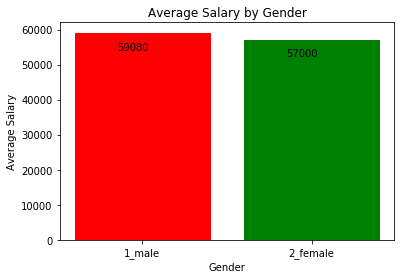

In [10]:
x=['1_male', '2_female']
y=list(gender_stats['Salary means'][1:3])

bars=plt.bar(x,y)

bars[0].set_color('r')
bars[1].set_color('g')


plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')  

plt.text(-0.15, int(gender_stats['Salary means'][1])-5000 , int(gender_stats['Salary means'][1]))
plt.text(0.85, int(gender_stats['Salary means'][2])-4500, int(gender_stats['Salary means'][2]))

plt.show()

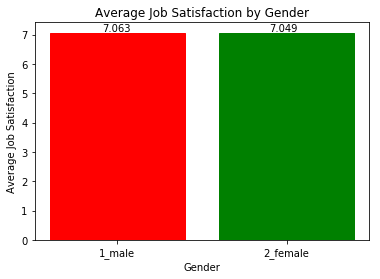

In [11]:
x=['1_male', '2_female']
y=list(gender_stats['Job Satisfaction means'][1:3])

bars=plt.bar(x,y)

bars[0].set_color('r')
bars[1].set_color('g')


plt.title('Average Job Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Job Satisfaction')  

plt.text(-0.09, int(gender_stats['Job Satisfaction means'][1])+0.1, "{:.3f}".format(gender_stats['Job Satisfaction means'][1]))
plt.text(0.9, int(gender_stats['Job Satisfaction means'][2])+0.1, "{:.3f}".format(gender_stats['Job Satisfaction means'][2]))

plt.show()

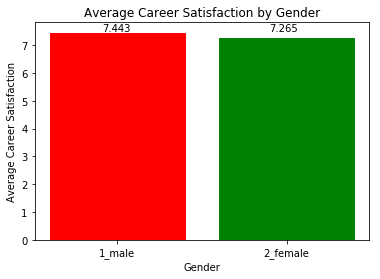

In [12]:
x=['1_male', '2_female']
y=list(gender_stats['Career Satisfaction means'][1:3])

bars=plt.bar(x,y)

bars[0].set_color('r')
bars[1].set_color('g')


plt.title('Average Career Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Career Satisfaction')  

plt.text(-0.09, int(gender_stats['Career Satisfaction means'][1])+0.5, "{:.3f}".format(gender_stats['Career Satisfaction means'][1]))
plt.text(0.9, int(gender_stats['Career Satisfaction means'][2])+0.5, "{:.3f}".format(gender_stats['Career Satisfaction means'][2]))

plt.show()

***Data exploration & question #2***

I already know that males and females have different average salaries, job satisfactions and career satisfactions. 

I would also like to explore whether males & females have different preferences and attitudes regarding their job. I identified the questions 29 - 45 of the schema to describe attitudes and preferences via agreement / disagreement to certain statements

In [13]:
schema[29:46]

,Column,Question
29,ProblemSolving,I love solving problems
30,BuildingThings,Building things is very rewarding
31,LearningNewTech,Learning new technologies is fun
32,BoringDetails,I tend to get bored by implementation details
33,JobSecurity,Job security is important to me
34,DiversityImportant,Diversity in the workplace is important
35,AnnoyingUI,It annoys me when software has a poor UI
36,FriendsDevelopers,"Most of my friends are developers, engineers, ..."
37,RightWrongWay,There's a right and a wrong way to do everything
38,UnderstandComputers,"Honestly, there's a lot about computers that I..."


In [14]:
preferences=list(schema[29:46]['Column'])

Exploration of how the results for the questions 29-45 were captured

In [15]:
for pt in preferences:
    print(df[pt].value_counts())

Strongly agree       6941
Agree                4438
Somewhat agree        740
Disagree               73
Strongly disagree      28
Name: ProblemSolving, dtype: int64
Strongly agree       6662
Agree                4645
Somewhat agree        777
Disagree               94
Strongly disagree      23
Name: BuildingThings, dtype: int64
Strongly agree       5711
Agree                5079
Somewhat agree       1251
Disagree              145
Strongly disagree      30
Name: LearningNewTech, dtype: int64
Disagree             4808
Somewhat agree       3821
Agree                1920
Strongly disagree    1075
Strongly agree        566
Name: BoringDetails, dtype: int64
Agree                5208
Somewhat agree       3112
Strongly agree       2749
Disagree              930
Strongly disagree     199
Name: JobSecurity, dtype: int64
Agree                4738
Strongly agree       3048
Somewhat agree       2946
Disagree              919
Strongly disagree     428
Name: DiversityImportant, dtype: int64
Strongly 

Data cleansing: Replacement of categories by integer values

In [16]:
for pt in preferences:
    dfmale[pt].replace(['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree'],[0,1,2,3,4], inplace=True)
    dffemale[pt].replace(['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree', 'Strongly agree'],[0,1,2,3,4], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Data preparation: Creation of dataframe as basis for the analysis

In [17]:
preferences_overview=pd.DataFrame(schema[29:46])
preferences_overview.set_index('Column', inplace=True)
preferences_overview

,Question
Column,
ProblemSolving,I love solving problems
BuildingThings,Building things is very rewarding
LearningNewTech,Learning new technologies is fun
BoringDetails,I tend to get bored by implementation details
JobSecurity,Job security is important to me
DiversityImportant,Diversity in the workplace is important
AnnoyingUI,It annoys me when software has a poor UI
FriendsDevelopers,"Most of my friends are developers, engineers, ..."
RightWrongWay,There's a right and a wrong way to do everything


Data analysis: Calculate level of agreement to statements by gender, sort by difference in average agreement

In [18]:
preferences_overview['male']=dfmale[preferences_overview.index].mean()
preferences_overview['female']=dffemale[preferences_overview.index].mean()
preferences_overview['average']=(preferences_overview['male']+preferences_overview['female'])/2
preferences_overview.sort_values('average', inplace=True, ascending=True)
preferences_overview

,Question,male,female,average
Column,,,,
WorkPayCare,"I don't really care what I work on, so long as...",1.134364,1.104222,1.119293
BoringDetails,I tend to get bored by implementation details,1.643205,1.674142,1.658674
CompetePeers,I think of myself as competing with my peers,1.765511,1.632275,1.698893
RightWrongWay,There's a right and a wrong way to do everything,2.035682,1.758213,1.896947
FriendsDevelopers,"Most of my friends are developers, engineers, ...",1.887453,2.142105,2.014779
UnderstandComputers,"Honestly, there's a lot about computers that I...",1.969055,2.292490,2.130772
InvestTimeTools,I invest a lot of time into the tools I use,2.612338,2.284392,2.448365
ChangeWorld,I want to change the world,2.465188,2.442536,2.453862
KinshipDevelopers,I feel a sense of kinship to other developers,2.515460,2.509259,2.512360


Data visualization

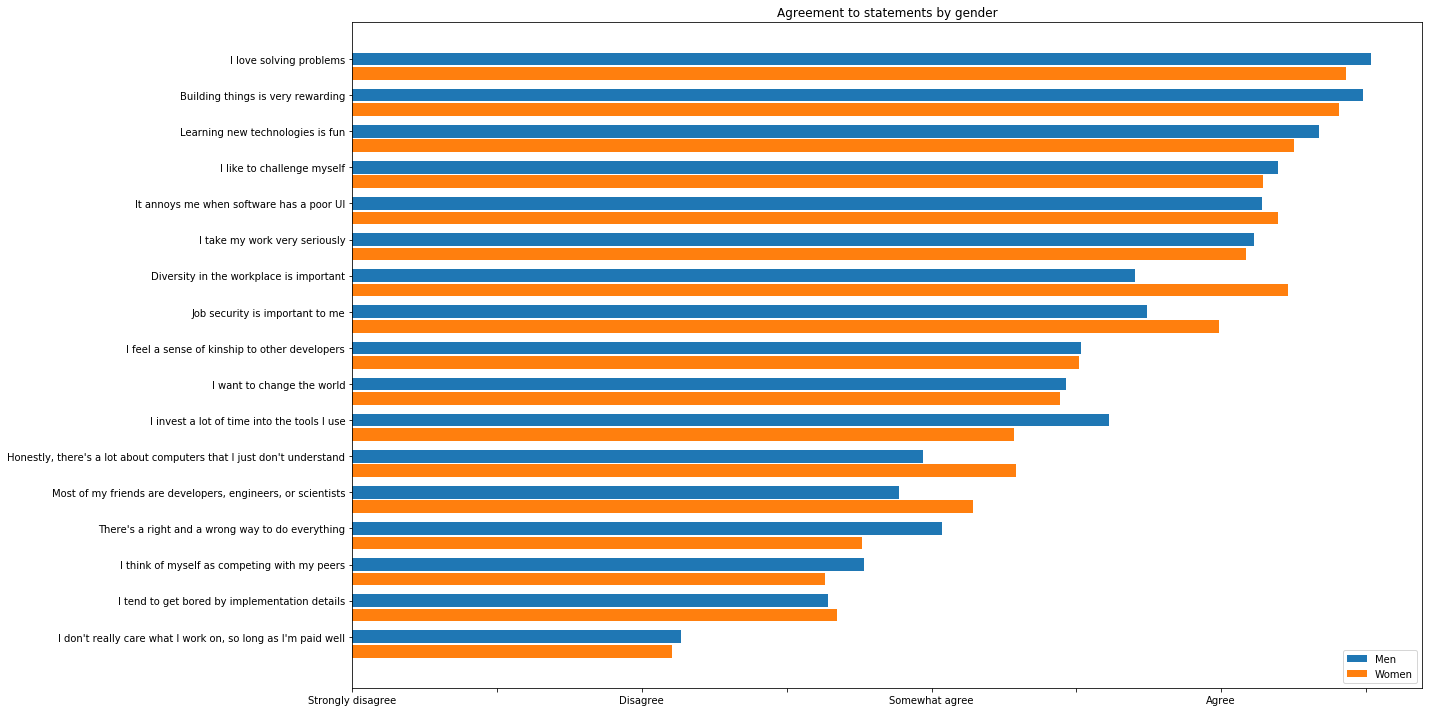

In [19]:
men_means = preferences_overview['male']
women_means = preferences_overview['female']

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.barh(ind, men_means, width, label='Men')
rects2 = ax.barh(ind-0.4, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Agreement to statements by gender')
#ax.set_xticks(ind)
ax.set_yticks(ind)
ax.set_xticklabels(('Strongly disagree', '','Disagree','', 'Somewhat agree', '','Agree','', 'Strongly agree'))
ax.set_yticklabels((preferences_overview.Question))
ax.legend()
fig.tight_layout()

plt.show()

Conclusion: The tendency of agreement to the statements is the same for males & females. However, there are some noteable differences. As an example, women value diversity in the workplace and job security more than man. On the other hand, men invest more time in the tools they use and agree more to the statement that there is a right and a wrong way to do everything

***Data exploration & question #3***

I already know that female and male data scientists have slightly different preferences and attitutes regarding their job. I am also interested of how these attitudes correlate with their Job Satisfaction, Career Satisfaction and Salary and if there are any differences between the genders. 

Data preparation: Create different datasets for the 3 analysis regarding Career Satisfaction, Job Satisfaction and Salary. 

Analysis: Analyze the correlations between Career Satisfaction / Job Satisfaction / Salary and the participants' preferences. 

In [20]:
dfmale_carsat=pd.DataFrame((dfmale.dropna(subset=['CareerSatisfaction'], how='any')).corr().CareerSatisfaction[3:21])
dffemale_carsat=pd.DataFrame((dffemale.dropna(subset=['CareerSatisfaction'], how='any')).corr().CareerSatisfaction[3:21])

dfmale_jobsat=pd.DataFrame((dfmale.dropna(subset=['JobSatisfaction'], how='any')).corr().JobSatisfaction[3:21])
dffemale_jobsat=pd.DataFrame((dffemale.dropna(subset=['JobSatisfaction'], how='any')).corr().JobSatisfaction[3:21])

dfmale_salary=pd.DataFrame((dfmale.dropna(subset=['Salary'], how='any')).corr().Salary[3:21])
dffemale_salary=pd.DataFrame((dffemale.dropna(subset=['Salary'], how='any')).corr().Salary[3:21])

Prepare visualization by compiling results of analysis in dataframe

In [21]:
preferences_overview_int1=preferences_overview.merge(dfmale_carsat, left_on='Column', right_on=dfmale_carsat.index)
preferences_overview_int1.rename(columns={'CareerSatisfaction': 'CareerSatisfaction - male'}, inplace=True)
preferences_overview_int2=preferences_overview_int1.merge(dffemale_carsat, left_on="Column", right_on=dffemale_carsat.index)
preferences_overview_int2.rename(columns={'CareerSatisfaction': 'CareerSatisfaction - female'}, inplace=True)

preferences_overview_int3=preferences_overview_int2.merge(dfmale_jobsat, left_on="Column", right_on=dfmale_jobsat.index)
preferences_overview_int3.rename(columns={'JobSatisfaction': 'JobSatisfaction - male'}, inplace=True)
preferences_overview_int4=preferences_overview_int3.merge(dffemale_jobsat, left_on="Column", right_on=dffemale_jobsat.index)
preferences_overview_int4.rename(columns={'JobSatisfaction': 'JobSatisfaction - female'}, inplace=True)

preferences_overview_int5=preferences_overview_int4.merge(dfmale_salary, left_on="Column", right_on=dfmale_salary.index)
preferences_overview_int5.rename(columns={'Salary': 'Salary - male'}, inplace=True)
preferences_overview_int6=preferences_overview_int5.merge(dffemale_salary, left_on="Column", right_on=dffemale_salary.index)
preferences_overview_int6.rename(columns={'Salary': 'Salary - female'}, inplace=True)

In [22]:
 preferences_overview_int6

,Column,Question,male,female,average,CareerSatisfaction - male,CareerSatisfaction - female,JobSatisfaction - male,JobSatisfaction - female,Salary - male,Salary - female
0,WorkPayCare,"I don't really care what I work on, so long as...",1.134364,1.104222,1.119293,-0.083639,0.023044,-0.069165,-0.022038,-0.001925,0.092146
1,BoringDetails,I tend to get bored by implementation details,1.643205,1.674142,1.658674,-0.110514,-0.121333,-0.070311,-0.126029,-0.089940,-0.082321
2,CompetePeers,I think of myself as competing with my peers,1.765511,1.632275,1.698893,-0.018885,-0.039489,-0.045946,-0.055653,-0.087598,-0.066830
3,RightWrongWay,There's a right and a wrong way to do everything,2.035682,1.758213,1.896947,0.001827,-0.004889,-0.013840,-0.056975,-0.181178,-0.306999
4,FriendsDevelopers,"Most of my friends are developers, engineers, ...",1.887453,2.142105,2.014779,0.024947,0.019152,-0.005388,0.012092,-0.039241,-0.034329
5,UnderstandComputers,"Honestly, there's a lot about computers that I...",1.969055,2.292490,2.130772,-0.092643,-0.063084,-0.056367,-0.020434,-0.127118,-0.164347
6,InvestTimeTools,I invest a lot of time into the tools I use,2.612338,2.284392,2.448365,0.120489,0.059993,0.076641,-0.019647,0.050537,-0.012621
7,ChangeWorld,I want to change the world,2.465188,2.442536,2.453862,0.014745,-0.009313,-0.006195,-0.003742,-0.053693,0.070905
8,KinshipDevelopers,I feel a sense of kinship to other developers,2.515460,2.509259,2.512360,0.147752,0.247677,0.111453,0.198501,0.078530,0.125756
9,JobSecurity,Job security is important to me,2.742177,2.990789,2.866483,0.013441,0.106165,0.016424,0.122751,0.004028,0.115328


I will move forward with only CareerSatisfaction as this seems most interesting to me. 

Further preparation for data visualization

In [23]:
preferences_overview_int6['CareerSatisfaction_avg']=(preferences_overview_int6['CareerSatisfaction - male']+preferences_overview_int6['CareerSatisfaction - female'])/2
preferences_overview_int6.sort_values('CareerSatisfaction_avg', inplace=True, ascending=True)

Data visualization

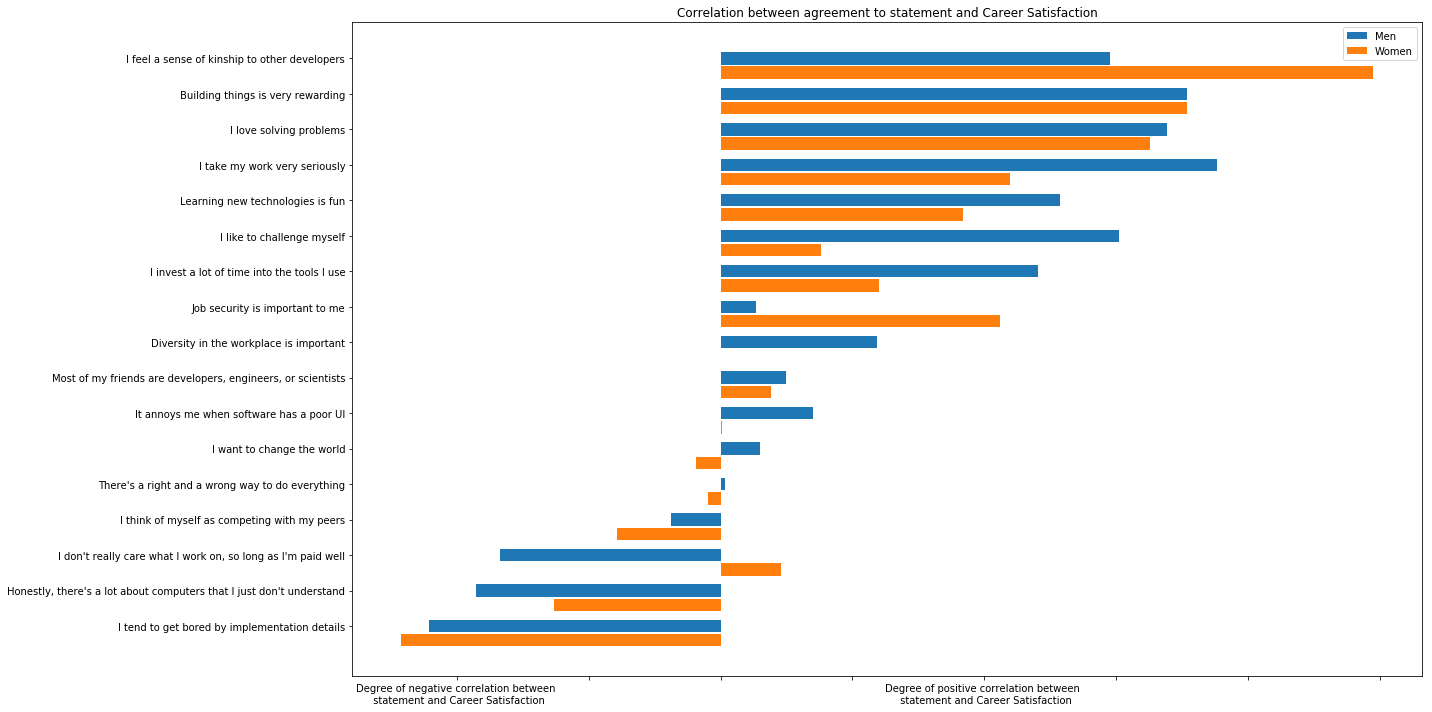

In [29]:
men_means = preferences_overview_int6['CareerSatisfaction - male']
women_means = preferences_overview_int6['CareerSatisfaction - female']

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.barh(ind, men_means, width, label='Men')
rects2 = ax.barh(ind-0.4, women_means, width, label='Women')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Correlation between agreement to statement and Career Satisfaction')
#ax.set_xticks(ind)
ax.set_yticks(ind)
ax.set_xticklabels(('', 'Degree of negative correlation between \n statement and Career Satisfaction', '', '','', 'Degree of positive correlation between \n statement and Career Satisfaction',''))
ax.set_yticklabels((preferences_overview_int6.Question))
ax.legend()
fig.tight_layout()

plt.show()
